In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [20]:
data = pd.read_csv('/content/crx.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  Class   690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## Retrive columns with null values

In [21]:
columns_with_null_values = list(data.isnull().sum().items())
columns_with_null_values

[('A1', 0),
 ('A2', 0),
 ('A3', 0),
 ('A4', 0),
 ('A5', 0),
 ('A6', 0),
 ('A7', 0),
 ('A8', 0),
 ('A9', 0),
 ('A10', 0),
 ('A11', 0),
 ('A12', 0),
 ('A13', 0),
 ('A14', 0),
 ('A15', 0),
 ('Class', 0)]

## Encode categorical variables in train data set

In [22]:
labelencoder = LabelEncoder()
le = preprocessing.LabelEncoder()

In [23]:
objFeatures = data.select_dtypes(include="object").columns
objFeatures
for feat in objFeatures:
    data[feat] = le.fit_transform(data[feat].astype(str))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    int64  
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    int64  
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  A15     690 non-null    int64  
 15  Class   690 non-null    int64  
dtypes: float64(2), int64(14)
memory usage: 86.4 KB


In [24]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,2,156,0.000,2,1,13,8,1.25,1,1,1,0,0,68,0,0
1,1,328,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560,0
2,1,89,0.500,2,1,11,4,1.50,1,0,0,0,0,96,824,0
3,2,125,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3,0
4,2,43,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0,0


In [25]:
data = data.drop(['A11','A13'],axis=1)
data = data.values

In [26]:
data

array([[2.000e+00, 1.560e+02, 0.000e+00, ..., 6.800e+01, 0.000e+00,
        0.000e+00],
       [1.000e+00, 3.280e+02, 4.460e+00, ..., 1.100e+01, 5.600e+02,
        0.000e+00],
       [1.000e+00, 8.900e+01, 5.000e-01, ..., 9.600e+01, 8.240e+02,
        0.000e+00],
       ...,
       [1.000e+00, 9.700e+01, 1.350e+01, ..., 6.700e+01, 1.000e+00,
        1.000e+00],
       [2.000e+00, 2.000e+01, 2.050e-01, ..., 9.600e+01, 7.500e+02,
        1.000e+00],
       [2.000e+00, 1.970e+02, 3.375e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

## Seperate features and labels | Seperate Train and test data set

In [27]:
X,y = data[:,0:13],data[:,13]
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)


## Check label distribution on train and test data set

(array([204.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 258.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

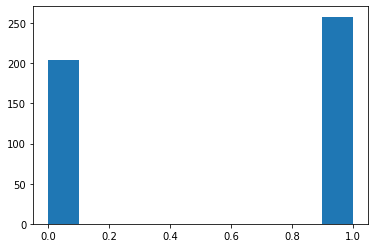

In [28]:
plt.hist(y_train)

(array([103.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 125.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

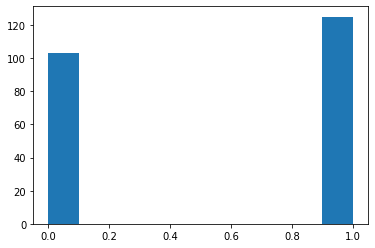

In [29]:
plt.hist(y_test)

## Normalize the data

### Plot 0th column data before normalizing

(array([  8.,   0.,   0.,   0.,   0., 140.,   0.,   0.,   0., 314.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

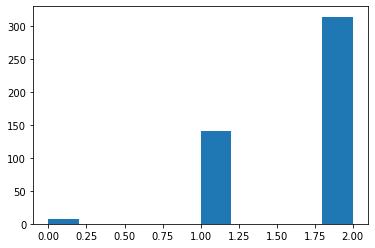

In [30]:
import matplotlib.pyplot as plt

plt.hist(X_train[:,0]) ## plot 0th column data to check data distridution

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

### Plot same data after normalizing

(array([  8.,   0.,   0.,   0.,   0., 140.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

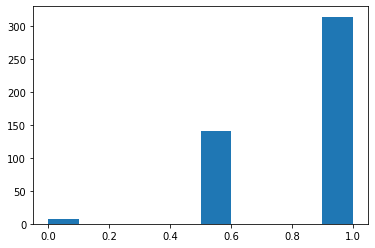

In [32]:
plt.hist(rescaledX_train[:,0])

## Check dimension of the train and test data set

In [33]:
print(X_train.shape)
print(X_train[0:3,])
print(y_train.shape)
print(y_train[0:3,])
print(X_test.shape)
print(X_test[0:3,])
print(y_test.shape)
print(y_test[0:3,])

(462, 13)
[[1.00e+00 8.70e+01 2.50e+00 3.00e+00 3.00e+00 7.00e+00 1.00e+00 4.50e+00
  0.00e+00 0.00e+00 0.00e+00 6.70e+01 4.56e+02]
 [2.00e+00 1.82e+02 2.75e+00 2.00e+00 1.00e+00 1.00e+01 8.00e+00 4.25e+00
  1.00e+00 1.00e+00 0.00e+00 6.90e+01 0.00e+00]
 [0.00e+00 1.70e+02 1.50e+00 2.00e+00 1.00e+00 2.00e+00 8.00e+00 2.50e-01
  0.00e+00 0.00e+00 1.00e+00 1.20e+02 1.22e+02]]
(462,)
[1. 0. 1.]
(228, 13)
[[1.00e+00 3.49e+02 1.50e+00 2.00e+00 1.00e+00 6.00e+00 3.00e+00 0.00e+00
  0.00e+00 1.00e+00 1.00e+00 6.70e+01 1.05e+02]
 [1.00e+00 2.71e+02 4.00e+00 2.00e+00 1.00e+00 8.00e+00 5.00e+00 0.00e+00
  1.00e+00 0.00e+00 0.00e+00 3.10e+01 9.60e+02]
 [2.00e+00 4.10e+01 0.00e+00 2.00e+00 1.00e+00 4.00e+00 8.00e+00 5.00e-01
  0.00e+00 0.00e+00 0.00e+00 4.60e+01 0.00e+00]]
(228,)
[1. 0. 1.]


# **Create Neural Network Models**

# ML Model 1

**Input Layer** = 13 neurons

**1st Hidden Layer** = 8 neurons

**2nd Hidden Layer** = 4 neurons

**Output Layer** = 1 neuron

**Activation Function** = Rectified Linear Unit

**Loss Function** = binary_crossentropy

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

kf = KFold(5, shuffle=True, random_state=42) # Use for KFold classification
oos_y = []
oos_pred = []


fold = 0
for train, test in kf.split(X):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    newModel = Sequential()
    #specify input dimension using number of features in  
    newModel.add(Dense(8, input_dim = len(X_train[0,:]), activation = 'relu'))
    newModel.add(Dense(4, activation ='relu'))
    #add 1(only one neuron in the last layer) since this do binary classificaion  
    newModel.add(Dense(1,activation='sigmoid'))

    newModel.compile(loss = 'binary_crossentropy' , optimizer='rmsprop', metrics=['accuracy'])
    
    newModel.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=0,
              epochs=500)
    
    # Model Prediction
    pred = newModel.predict(x_test)
    
    oos_y.append(y_test)
    oos_pred.append(pred)    

    # Measure this fold's RMSE
    score = np.sqrt(metrics.mean_squared_error(pred,y_test))
    #print(f"Fold score (RMSE): {score}")
    f1score = f1_score(y_test,pred.round())
    print("F1-Score : %.2f" % ( f1score))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_pred,oos_y))

print(f"Mean squared error regression loss: {score}") 
 
    



Fold #1
F1-Score : 0.80
Fold #2
F1-Score : 0.87
Fold #3
F1-Score : 0.85
Fold #4
F1-Score : 0.89
Fold #5
F1-Score : 0.65
Mean squared error regression loss: 0.3893486971690928


# ML Model 2

**Input Layer** = 13 neurons

**1st Hidden Layer** = 27 neurons

**Output Layer** = 1 neuron

**Activation Function** = sigmoid

**Loss Function** = binary_crossentropy

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,log_loss
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

kf = KFold(5, shuffle=True, random_state=42) # Use for KFold classification
oos_y = []
oos_pred = []


fold = 0
for train, test in kf.split(X):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    newModel = Sequential()
    #specify input dimension using number of features in  
    newModel.add(Dense(27, input_dim = len(X_train[0,:]), activation = 'sigmoid'))
    #add 1(only one neuron in the last layer) since this do binary classificaion  
    newModel.add(Dense(1,activation='sigmoid'))

    newModel.compile(loss = 'binary_crossentropy' , optimizer='rmsprop', metrics=['accuracy'])
    
    newModel.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=0,
              epochs=500)
    
    # Model Prediction
    pred = newModel.predict(x_test)
    
    oos_y.append(y_test)
    oos_pred.append(pred)    

    # Measure this fold's RMSE
    score = np.sqrt(metrics.mean_squared_error(pred,y_test))
    #print(f"Fold score (RMSE): {score}")
    f1score = f1_score(y_test,pred.round())
    print("F1-Score : %.2f" % ( f1score))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_pred,oos_y))
logLoss = metrics.log_loss(oos_y,oos_pred)
print(f"Mean squared error regression loss: {score}") 
print(f"Cross-entropy loss: {logLoss}")   
    
# Write the cross-validated prediction
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)


Fold #1
F1-Score : 0.84
Fold #2
F1-Score : 0.88
Fold #3
F1-Score : 0.82
Fold #4
F1-Score : 0.88
Fold #5
F1-Score : 0.84
Mean squared error regression loss: 0.3399642628816323
Cross-entropy loss: 0.4074338646381005


# ML Model 3

**Input Layer** = 13 neurons

**1st Hidden Layer** = 8 neurons

**2nd Hidden Layer** = 4 neurons

**Output Layer** = 1 neuron

**Activation Function** = sigmoid

**Loss Function** = binary_crossentropy

*Use callbacks in during training*

In [36]:
kf = KFold(5, shuffle=True, random_state=42) # Use for KFold classification
f1Scores = []
oos_pred = []


fold = 0
for train, test in kf.split(X):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    model1 = Sequential()
    #specify input dimension using number of features in  
    model1.add(Dense(8, input_dim = len(X_train[0,:]), activation = 'relu'))
    model1.add(Dense(4, activation ='relu'))
    #add 1(only one neuron in the last layer) since this do binary classificaion  
    model1.add(Dense(1,activation='sigmoid'))

    from keras import callbacks
    from keras.callbacks import EarlyStopping, ModelCheckpoint
    callback_a = ModelCheckpoint (filepath='my_best_model.hdf5',monitor='val_loss', save_best_only=True, save_weights_only=False)
    callback_b = EarlyStopping(monitor='val_loss',mode='min',patience=20,verbose=1)

    model1.compile(loss = 'binary_crossentropy' , optimizer='rmsprop', metrics=['accuracy'])
    
    model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=256, batch_size=10, callbacks = [callback_a,callback_b])
    
    pred = model1.predict(x_test)
    
    #print(f"Fold score (RMSE): {score}")
    f1score = f1_score(y_test,pred.round())
    f1Scores.append(f1score)
    print("F1-Score : %.2f" % ( f1score))

foldNumber = 1
for val in f1Scores:
    print(f"Fold #{foldNumber}")
    foldNumber+=1
    print("F1-Score : %.2f" % ( val))
  
    

Fold #1
Epoch 1/256
56/56 [==============================] - 1s 5ms/step - loss: 57.4058 - accuracy: 0.4293 - val_loss: 55.8404 - val_accuracy: 0.5072
Epoch 2/256
56/56 [==============================] - 0s 2ms/step - loss: 35.0174 - accuracy: 0.4293 - val_loss: 32.9599 - val_accuracy: 0.5072
Epoch 3/256
56/56 [==============================] - 0s 2ms/step - loss: 19.2798 - accuracy: 0.4312 - val_loss: 17.2177 - val_accuracy: 0.5072
Epoch 4/256
56/56 [==============================] - 0s 2ms/step - loss: 9.4718 - accuracy: 0.4330 - val_loss: 8.1289 - val_accuracy: 0.4928
Epoch 5/256
56/56 [==============================] - 0s 2ms/step - loss: 3.4516 - accuracy: 0.5290 - val_loss: 3.4642 - val_accuracy: 0.4710
Epoch 6/256
56/56 [==============================] - 0s 3ms/step - loss: 1.6710 - accuracy: 0.6178 - val_loss: 2.4901 - val_accuracy: 0.5072
Epoch 7/256
56/56 [==============================] - 0s 3ms/step - loss: 1.3381 - accuracy: 0.6214 - val_loss: 2.2165 - val_accuracy: 0.5072


## ML Model 4

**Input Layer** = 13 neurons

**1st Hidden Layer** = 20 neurons

**2nd Hidden Layer** = 10 neurons

**Output Layer** = 1 neuron

**Activation Function** = sigmoid

**Loss Function** = binary_crossentropy



In [44]:
from tensorflow.keras import regularizers

kf = KFold(5, shuffle=True, random_state=10) # Use for KFold classification
oos_y = []
oos_pred = []


fold = 0
for train, test in kf.split(X):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]
    
    Model2 = Sequential()
    Model2.add(Dense(8, input_dim=X.shape[1], activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
    Model2.add(Dense(4, activation='relu'))
    Model2.add(Dense(1,activation='sigmoid'))
    Model2.compile(loss='mean_squared_error', optimizer='adam')




    Model2.compile(loss = 'binary_crossentropy' , optimizer='rmsprop', metrics=['accuracy'])
    
    Model2.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=0,epochs=500)
    
    pred = Model2.predict(x_test)
    
    oos_y.append(y_test)
    oos_pred.append(pred)    

    # Measure this fold's RMSE
    score = np.sqrt(metrics.mean_squared_error(pred,y_test))
    #print(f"Fold score (RMSE): {score}")
    
    f1score = f1_score(y_test,pred.round())
    print("F1-Score : %.2f" % ( f1score))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_pred,oos_y))
#print(f"Final, out of sample score (RMSE): {score}")    
    
# Write the cross-validated prediction
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)

Fold #1
F1-Score : 0.83
Fold #2
F1-Score : 0.86
Fold #3
F1-Score : 0.82
Fold #4
F1-Score : 0.84
Fold #5
F1-Score : 0.88
